# 1. Regression Methods

## Load and Preprocess Data
Load the PlayStore.csv dataset, identify the target variable and features

In [1]:
import pandas as pd

df = pd.read_csv('/content/PlayStore.csv')
df.head()

,App,Rating,Reviews,Size,Installs,Price,Last Updated,Current Ver,Android Ver,Updated_Year,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,-0.167710,-0.162743,-0.106702,-0.190854,-0.059496,2018-01-07,1.0.0,4.0.3 and up,0.536056,...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,-0.550169,-0.162465,-0.337542,-0.185182,-0.059496,2018-01-15,2.0.0,4.0.3 and up,0.536056,...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.979665,-0.132681,-0.582233,-0.133096,-0.059496,2018-08-01,1.2.4,4.0.3 and up,0.536056,...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,0.597207,-0.088583,0.170307,0.387770,-0.059496,2018-06-08,Varies with device,4.2 and up,0.536056,...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,0.214748,-0.162465,-0.854625,-0.189812,-0.059496,2018-06-20,1.1,4.4 and up,0.536056,...,False,False,False,False,False,False,False,False,False,False


In [2]:
target_variable = 'Rating'
features_to_drop = ['App', 'Last Updated', 'Current Ver', 'Android Ver']

X = df.drop(columns=[target_variable] + features_to_drop)
y = df[target_variable]

print(f"Target variable (y) shape: {y.shape}")
print(f"Features (X) shape: {X.shape}")

Target variable (y) shape: (8887,)
Features (X) shape: (8887, 98)


## Splitting Data


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7109, 98)
X_test shape: (1778, 98)
y_train shape: (7109,)
y_test shape: (1778,)


## Implementing Evaluation Metrics

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Implementing Linear Regression

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

metrics_df = pd.DataFrame({
    'Model': ['Linear Regression'],
    'MSE': [mse_linear],
    'RMSE': [rmse_linear],
    'MAE': [mae_linear],
    'MAPE': [mape_linear],
    'R2': [r2_linear]
})

print(metrics_df)

               Model       MSE      RMSE       MAE       MAPE        R2
0  Linear Regression  0.927811  0.963229  0.652122  175.62618  0.088404


## Implementing Ridge Regression


In [10]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

ridge_metrics = pd.DataFrame({
    'Model': ['Ridge Regression'],
    'MSE': [mse_ridge],
    'RMSE': [rmse_ridge],
    'MAE': [mae_ridge],
    'MAPE': [mape_ridge],
    'R2': [r2_ridge]
})

metrics_df = pd.concat([metrics_df, ridge_metrics], ignore_index=True)

print(metrics_df)

               Model       MSE      RMSE       MAE        MAPE        R2
0  Linear Regression  0.927811  0.963229  0.652122  175.626180  0.088404
1   Ridge Regression  0.926717  0.962662  0.651549  175.185246  0.089479


## Implementing LASSO Regression

In [11]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

lasso_metrics = pd.DataFrame({
    'Model': ['LASSO Regression'],
    'MSE': [mse_lasso],
    'RMSE': [rmse_lasso],
    'MAE': [mae_lasso],
    'MAPE': [mape_lasso],
    'R2': [r2_lasso]
})

metrics_df = pd.concat([metrics_df, lasso_metrics], ignore_index=True)

print(metrics_df)

               Model       MSE      RMSE       MAE        MAPE            R2
0  Linear Regression  0.927811  0.963229  0.652122  175.626180  8.840423e-02
1   Ridge Regression  0.926717  0.962662  0.651549  175.185246  8.947877e-02
2   LASSO Regression  1.017788  1.008855  0.695931   99.932384 -5.038685e-07


## Implementing Kernel Regression

In [12]:
from sklearn.kernel_ridge import KernelRidge

kr_model = KernelRidge(alpha=1.0, kernel='rbf')
kr_model.fit(X_train, y_train)

y_pred_kr = kr_model.predict(X_test)

mse_kr = mean_squared_error(y_test, y_pred_kr)
rmse_kr = np.sqrt(mse_kr)
mae_kr = mean_absolute_error(y_test, y_pred_kr)
mape_kr = mean_absolute_percentage_error(y_test, y_pred_kr)
r2_kr = r2_score(y_test, y_pred_kr)

kr_metrics = pd.DataFrame({
    'Model': ['Kernel Regression'],
    'MSE': [mse_kr],
    'RMSE': [rmse_kr],
    'MAE': [mae_kr],
    'MAPE': [mape_kr],
    'R2': [r2_kr]
})

metrics_df = pd.concat([metrics_df, kr_metrics], ignore_index=True)

print(metrics_df)

               Model       MSE      RMSE       MAE        MAPE            R2
0  Linear Regression  0.927811  0.963229  0.652122  175.626180  8.840423e-02
1   Ridge Regression  0.926717  0.962662  0.651549  175.185246  8.947877e-02
2   LASSO Regression  1.017788  1.008855  0.695931   99.932384 -5.038685e-07
3  Kernel Regression  0.859753  0.927229  0.622662  182.487404  1.552725e-01


## Implementing Polynomial Regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

poly_metrics = pd.DataFrame({
    'Model': ['Polynomial Regression'],
    'MSE': [mse_poly],
    'RMSE': [rmse_poly],
    'MAE': [mae_poly],
    'MAPE': [mape_poly],
    'R2': [r2_poly]
})

metrics_df = pd.concat([metrics_df, poly_metrics], ignore_index=True)

print(metrics_df)

                   Model       MSE      RMSE       MAE        MAPE  \
0      Linear Regression  0.927811  0.963229  0.652122  175.626180   
1       Ridge Regression  0.926717  0.962662  0.651549  175.185246   
2       LASSO Regression  1.017788  1.008855  0.695931   99.932384   
3      Kernel Regression  0.859753  0.927229  0.622662  182.487404   
4  Polynomial Regression  1.261643  1.123229  0.719899  261.380927   

             R2  
0  8.840423e-02  
1  8.947877e-02  
2 -5.038685e-07  
3  1.552725e-01  
4 -2.395934e-01  


## Comparing Model Performance

In [14]:
print("Comparison of All Regression Models' Performance:")
print(metrics_df.sort_values(by='RMSE'))

Comparison of All Regression Models' Performance:
                   Model       MSE      RMSE       MAE        MAPE  \
3      Kernel Regression  0.859753  0.927229  0.622662  182.487404   
1       Ridge Regression  0.926717  0.962662  0.651549  175.185246   
0      Linear Regression  0.927811  0.963229  0.652122  175.626180   
2       LASSO Regression  1.017788  1.008855  0.695931   99.932384   
4  Polynomial Regression  1.261643  1.123229  0.719899  261.380927   

             R2  
3  1.552725e-01  
1  8.947877e-02  
0  8.840423e-02  
2 -5.038685e-07  
4 -2.395934e-01  


## Question 1
### Choose the best regression metric for your dataset and justify.


---



For this task, **RMSE is the most appropriate metric**. It provides an error measure in the same scale as the app rating and penalizes larger mistakes more strongly, which is important when predicting user ratings. Metrics like MAPE behave poorly with small target values, and MAE does not reflect the impact of large errors as clearly.
Moreover, while R-squared gives a measure of how well unseen samples are likely to be predicted by the model, its values are drastically low across all models (especially for LASSO and Polynomial Regression which even have negative R-squared, indicating that the model performs worse than simply predicting the mean). In such scenarios, an absolute error metric like RMSE (or MAE) provides a more concrete understanding of the prediction error magnitude.

## Question 2
### Explain when each regression model is preferable.


---




**Linear Regression:** Linear Regression is preferred when there is an assumption or evidence of a linear relationship between the features and the target variable. It's highly valued for its simplicity and interpretability, making it an excellent baseline model for initial analysis. It performs well when the dataset is not too complex, the number of features is relatively small, and multicollinearity is not a severe issue.

**Ridge Regression:** Ridge Regression is particularly useful when dealing with multicollinearity (highly correlated independent variables) in the dataset. By adding an L2 penalty term to the cost function, it shrinks the regression coefficients, which helps in preventing overfitting, especially when there are many features. Ridge Regression is preferred when most features are relevant, but their coefficients need regularization to improve generalization.

**LASSO Regression:** LASSO (Least Absolute Shrinkage and Selection Operator) Regression is ideal when feature selection is important or when there are many features, some of which may be irrelevant. Its L1 penalty term can shrink coefficients all the way to zero, effectively performing automatic feature selection by excluding less important variables from the model. This makes LASSO preferable when a sparse model is desired or when identifying the most impactful features is a primary goal.

**Kernel Regression:** Kernel Regression, often implemented through Kernel Ridge Regression (as used in this notebook) or Support Vector Regression with a kernel, is preferable for datasets where the relationship between features and the target variable is highly non-linear. It implicitly maps the input features into a higher-dimensional space where they might become linearly separable. This allows it to capture complex patterns that linear models cannot, making it suitable for intricate data structures.

**Polynomial Regression:** Polynomial Regression is employed when there is a curvilinear relationship between the features and the target variable. By adding polynomial terms (e.g., squared or cubed terms) of the independent variables, it can model a wider range of curves than simple linear regression. It's effective for capturing these specific non-linear trends, but caution must be exercised with higher degrees, as it can easily lead to overfitting, resulting in a model that performs poorly on unseen data.

## Question 3
### Briefly explain the kernel trick in a few sentences and how it can help achieve better regression results.


---




The **kernel trick** allows a model to learn complex, non-linear patterns without explicitly transforming the data into higher dimensions. Instead, it uses a kernel function to compute similarities between data points as if they were mapped into a richer feature space.

This helps regression by capturing relationships that a simple linear model cannot, often leading to **better accuracy** when the true pattern in the data is non-linear.


# 2. Binary Classification Methods

## Convert the `Rating` target variable into a binary target based on a threshold


In [3]:
median_rating = y.median()
y_binary = (y > median_rating).astype(int)

print(f"Median rating: {median_rating}")
print("First 5 rows of new binary target variable (y_binary):")
print(y_binary.head())
print(f"Value counts for y_binary:\n{y_binary.value_counts()}")

Median rating: 0.2147482549872153
First 5 rows of new binary target variable (y_binary):
0    0
1    0
2    1
3    1
4    0
Name: Rating, dtype: int64
Value counts for y_binary:
Rating
0    5042
1    3845
Name: count, dtype: int64


## Splitting Data into Train & Test Sets

In [4]:
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_binary, test_size=0.2, random_state=42)

print(f"X_train_clf shape: {X_train_clf.shape}")
print(f"X_test_clf shape: {X_test_clf.shape}")
print(f"y_train_clf shape: {y_train_clf.shape}")
print(f"y_test_clf shape: {y_test_clf.shape}")

X_train_clf shape: (7109, 98)
X_test_clf shape: (1778, 98)
y_train_clf shape: (7109,)
y_test_clf shape: (1778,)


## Logistic Regression


In [36]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

lr_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
lr_model.fit(X_train_clf, y_train_clf)

y_pred_lr = lr_model.predict(X_test_clf)
y_proba_lr = lr_model.predict_proba(X_test_clf)[:, 1]

metrics_df_clf = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

Logistic Regression Metrics:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.691226   0.677365  0.528327  0.593634  0.739611


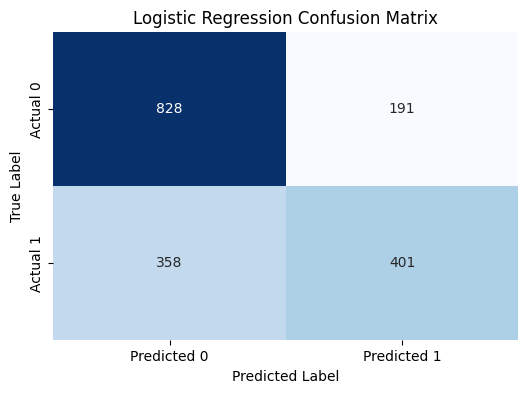

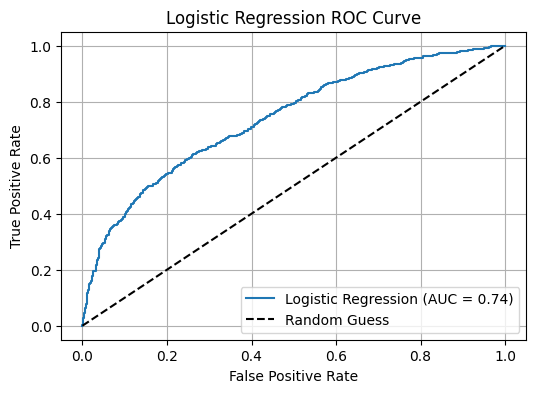

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_lr = accuracy_score(y_test_clf, y_pred_lr)
precision_lr = precision_score(y_test_clf, y_pred_lr)
recall_lr = recall_score(y_test_clf, y_pred_lr)
f1_lr = f1_score(y_test_clf, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test_clf, y_proba_lr)

metrics_df_clf.loc[len(metrics_df_clf)] = ['Logistic Regression', accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr]

print("Logistic Regression Metrics:")
print(metrics_df_clf)

# Plot Confusion Matrix
cm_lr = confusion_matrix(y_test_clf, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test_clf, y_proba_lr)
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


## Implement SVM

In [38]:
from sklearn.svm import SVC

svm_linear_model = SVC(kernel='linear', probability=True, random_state=42)
svm_linear_model.fit(X_train_clf, y_train_clf)

y_pred_svm_linear = svm_linear_model.predict(X_test_clf)
y_proba_svm_linear = svm_linear_model.predict_proba(X_test_clf)[:, 1]

accuracy_svm_linear = accuracy_score(y_test_clf, y_pred_svm_linear)
precision_svm_linear = precision_score(y_test_clf, y_pred_svm_linear)
recall_svm_linear = recall_score(y_test_clf, y_pred_svm_linear)
f1_svm_linear = f1_score(y_test_clf, y_pred_svm_linear)
roc_auc_svm_linear = roc_auc_score(y_test_clf, y_proba_svm_linear)

metrics_df_clf.loc[len(metrics_df_clf)] = ['SVM (Linear Kernel)', accuracy_svm_linear, precision_svm_linear, recall_svm_linear, f1_svm_linear, roc_auc_svm_linear]

print("SVM (Linear Kernel) Metrics:")
print(metrics_df_clf)

SVM (Linear Kernel) Metrics:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.691226   0.677365  0.528327  0.593634  0.739611
1  SVM (Linear Kernel)  0.694601   0.707692  0.484848  0.575450  0.743635


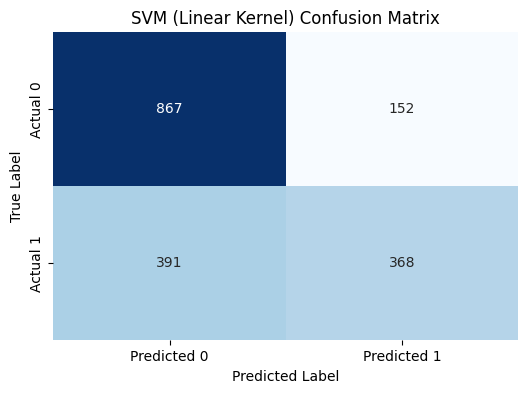

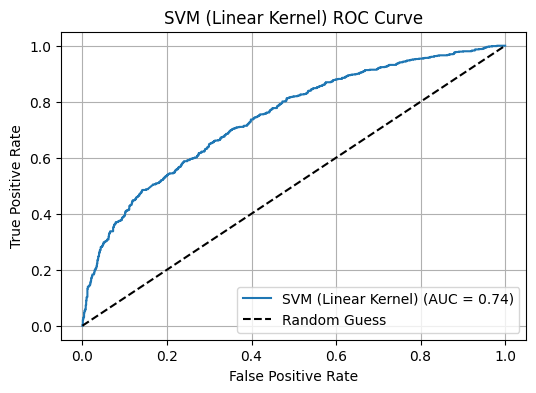

In [8]:
# Plot Confusion Matrix
cm_svm_linear = confusion_matrix(y_test_clf, y_pred_svm_linear)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm_linear, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('SVM (Linear Kernel) Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_test_clf, y_proba_svm_linear)
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm_linear, tpr_svm_linear, label=f'SVM (Linear Kernel) (AUC = {roc_auc_svm_linear:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM (Linear Kernel) ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## Kernel SVM (RBF Kernel)


SVM (RBF Kernel) Metrics:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.691226   0.677365  0.528327  0.593634  0.739611
1  SVM (Linear Kernel)  0.694601   0.707692  0.484848  0.575450  0.743635
2     SVM (RBF Kernel)  0.700225   0.710037  0.503294  0.589052  0.740447


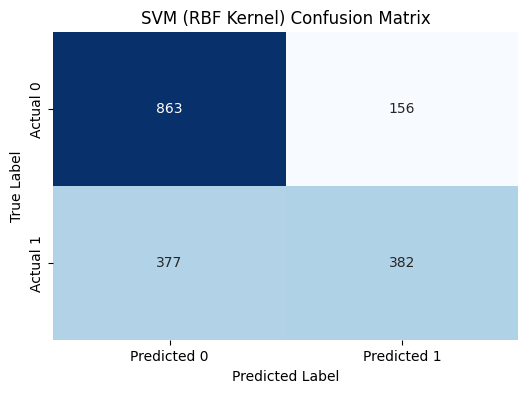

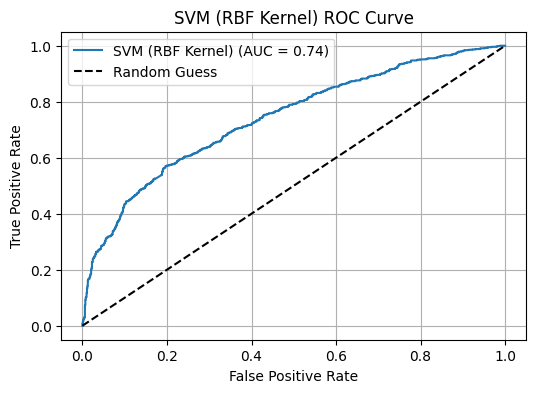

In [39]:
svm_rbf_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf_model.fit(X_train_clf, y_train_clf)

y_pred_svm_rbf = svm_rbf_model.predict(X_test_clf)
y_proba_svm_rbf = svm_rbf_model.predict_proba(X_test_clf)[:, 1]

accuracy_svm_rbf = accuracy_score(y_test_clf, y_pred_svm_rbf)
precision_svm_rbf = precision_score(y_test_clf, y_pred_svm_rbf)
recall_svm_rbf = recall_score(y_test_clf, y_pred_svm_rbf)
f1_svm_rbf = f1_score(y_test_clf, y_pred_svm_rbf)
roc_auc_svm_rbf = roc_auc_score(y_test_clf, y_proba_svm_rbf)

metrics_df_clf.loc[len(metrics_df_clf)] = ['SVM (RBF Kernel)', accuracy_svm_rbf, precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, roc_auc_svm_rbf]

print("SVM (RBF Kernel) Metrics:")
print(metrics_df_clf)

# Plot Confusion Matrix
cm_svm_rbf = confusion_matrix(y_test_clf, y_pred_svm_rbf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm_rbf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('SVM (RBF Kernel) Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_test_clf, y_proba_svm_rbf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm_rbf, tpr_svm_rbf, label=f'SVM (RBF Kernel) (AUC = {roc_auc_svm_rbf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM (RBF Kernel) ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## K-Nearest Neighbors (KNN)

K-Nearest Neighbors Model Metrics:
                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0     Logistic Regression  0.691226   0.677365  0.528327  0.593634  0.739611
1     SVM (Linear Kernel)  0.694601   0.707692  0.484848  0.575450  0.743635
2        SVM (RBF Kernel)  0.700225   0.710037  0.503294  0.589052  0.740447
3  K-Nearest Neighbors(5)  0.628796   0.576271  0.492754  0.531250  0.657357


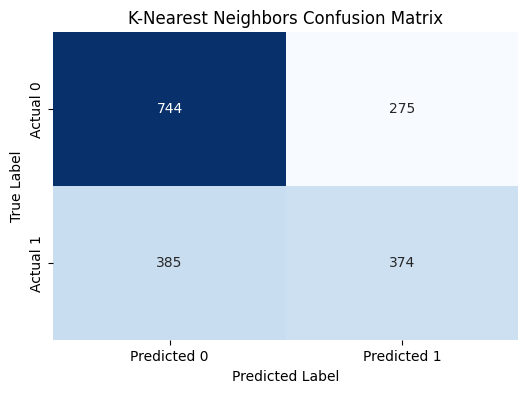

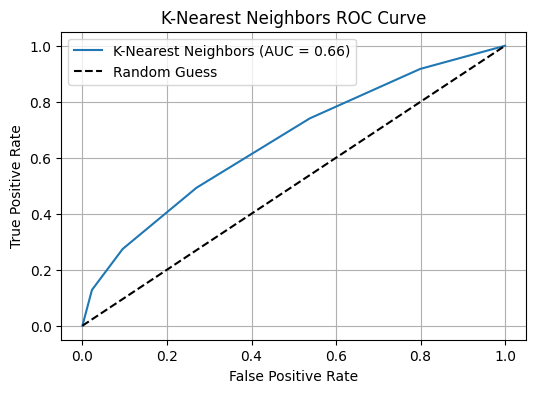

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_clf, y_train_clf)

y_pred_knn = knn_model.predict(X_test_clf)
y_proba_knn = knn_model.predict_proba(X_test_clf)[:, 1]

accuracy_knn = accuracy_score(y_test_clf, y_pred_knn)
precision_knn = precision_score(y_test_clf, y_pred_knn)
recall_knn = recall_score(y_test_clf, y_pred_knn)
f1_knn = f1_score(y_test_clf, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test_clf, y_proba_knn)

metrics_df_clf.loc[len(metrics_df_clf)] = ['K-Nearest Neighbors(5)', accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn]

print("K-Nearest Neighbors Model Metrics:")
print(metrics_df_clf)

# Plot Confusion Matrix
cm_knn = confusion_matrix(y_test_clf, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test_clf, y_proba_knn)
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

K-Nearest Neighbors Model Metrics:
                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0     Logistic Regression  0.691226   0.677365  0.528327  0.593634  0.739611
1     SVM (Linear Kernel)  0.694601   0.707692  0.484848  0.575450  0.743635
2        SVM (RBF Kernel)  0.700225   0.710037  0.503294  0.589052  0.740447
3  K-Nearest Neighbors(5)  0.628796   0.576271  0.492754  0.531250  0.657357
4  K-Nearest Neighbors(7)  0.631046   0.582137  0.480896  0.526696  0.656863


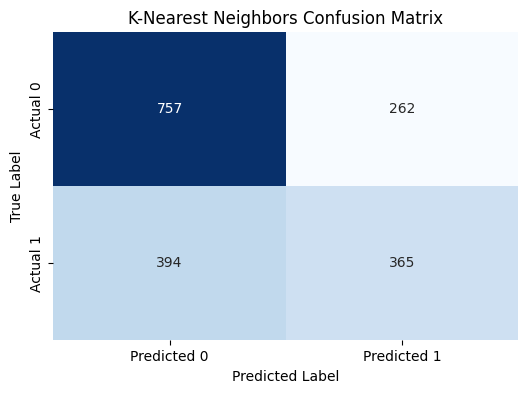

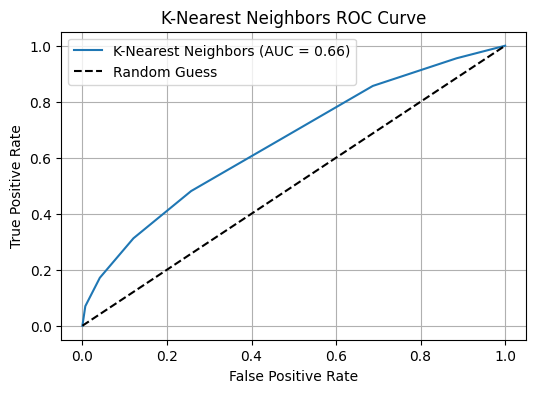

In [41]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_clf, y_train_clf)

y_pred_knn = knn_model.predict(X_test_clf)
y_proba_knn = knn_model.predict_proba(X_test_clf)[:, 1]

accuracy_knn = accuracy_score(y_test_clf, y_pred_knn)
precision_knn = precision_score(y_test_clf, y_pred_knn)
recall_knn = recall_score(y_test_clf, y_pred_knn)
f1_knn = f1_score(y_test_clf, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test_clf, y_proba_knn)

metrics_df_clf.loc[len(metrics_df_clf)] = ['K-Nearest Neighbors(7)', accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn]

print("K-Nearest Neighbors Model Metrics:")
print(metrics_df_clf)

# Plot Confusion Matrix
cm_knn = confusion_matrix(y_test_clf, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test_clf, y_proba_knn)
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

K-Nearest Neighbors Model Metrics:
                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0     Logistic Regression  0.691226   0.677365  0.528327  0.593634  0.739611
1     SVM (Linear Kernel)  0.694601   0.707692  0.484848  0.575450  0.743635
2        SVM (RBF Kernel)  0.700225   0.710037  0.503294  0.589052  0.740447
3  K-Nearest Neighbors(5)  0.628796   0.576271  0.492754  0.531250  0.657357
4  K-Nearest Neighbors(7)  0.631046   0.582137  0.480896  0.526696  0.656863
5  K-Nearest Neighbors(3)  0.633296   0.578331  0.520422  0.547850  0.655179


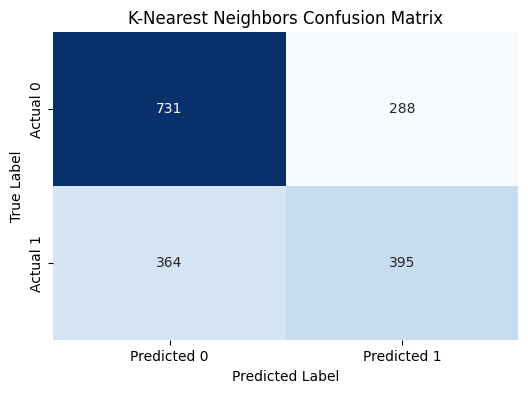

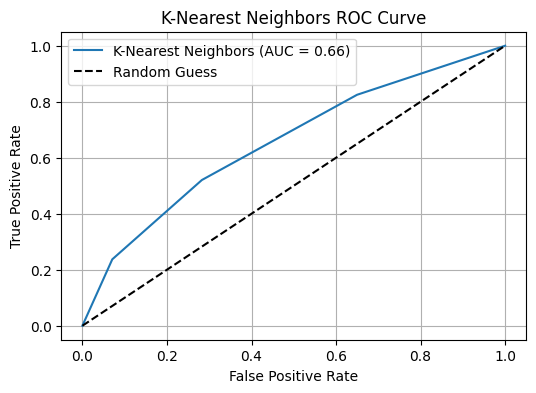

In [42]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_clf, y_train_clf)

y_pred_knn = knn_model.predict(X_test_clf)
y_proba_knn = knn_model.predict_proba(X_test_clf)[:, 1]

accuracy_knn = accuracy_score(y_test_clf, y_pred_knn)
precision_knn = precision_score(y_test_clf, y_pred_knn)
recall_knn = recall_score(y_test_clf, y_pred_knn)
f1_knn = f1_score(y_test_clf, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test_clf, y_proba_knn)

metrics_df_clf.loc[len(metrics_df_clf)] = ['K-Nearest Neighbors(3)', accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn]

print("K-Nearest Neighbors Model Metrics:")
print(metrics_df_clf)

# Plot Confusion Matrix
cm_knn = confusion_matrix(y_test_clf, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test_clf, y_proba_knn)
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## Decision Tree

Decision Tree Model Metrics:
                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0     Logistic Regression  0.691226   0.677365  0.528327  0.593634  0.739611
1     SVM (Linear Kernel)  0.694601   0.707692  0.484848  0.575450  0.743635
2        SVM (RBF Kernel)  0.700225   0.710037  0.503294  0.589052  0.740447
3  K-Nearest Neighbors(5)  0.628796   0.576271  0.492754  0.531250  0.657357
4  K-Nearest Neighbors(7)  0.631046   0.582137  0.480896  0.526696  0.656863
5  K-Nearest Neighbors(3)  0.633296   0.578331  0.520422  0.547850  0.655179
6       Decision Tree(50)  0.655231   0.594560  0.604743  0.599608  0.648790


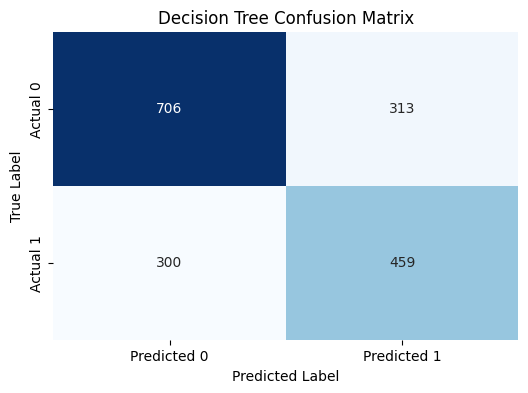

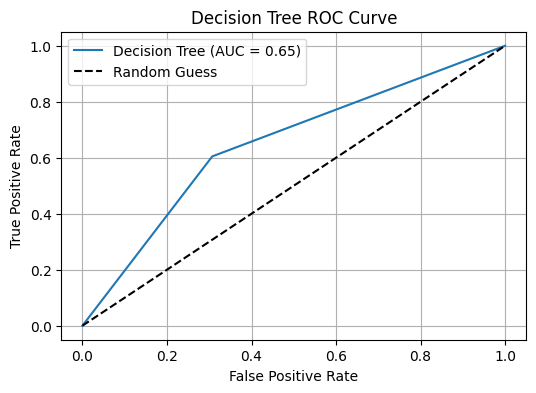

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth=50)
dt_model.fit(X_train_clf, y_train_clf)

y_pred_dt = dt_model.predict(X_test_clf)
y_proba_dt = dt_model.predict_proba(X_test_clf)[:, 1]

accuracy_dt = accuracy_score(y_test_clf, y_pred_dt)
precision_dt = precision_score(y_test_clf, y_pred_dt)
recall_dt = recall_score(y_test_clf, y_pred_dt)
f1_dt = f1_score(y_test_clf, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test_clf, y_proba_dt)

metrics_df_clf.loc[len(metrics_df_clf)] = ['Decision Tree(50)', accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt]

print("Decision Tree Model Metrics:")
print(metrics_df_clf)

# Plot Confusion Matrix
cm_dt = confusion_matrix(y_test_clf, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test_clf, y_proba_dt)
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Decision Tree Model Metrics:
                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0     Logistic Regression  0.691226   0.677365  0.528327  0.593634  0.739611
1     SVM (Linear Kernel)  0.694601   0.707692  0.484848  0.575450  0.743635
2        SVM (RBF Kernel)  0.700225   0.710037  0.503294  0.589052  0.740447
3  K-Nearest Neighbors(5)  0.628796   0.576271  0.492754  0.531250  0.657357
4  K-Nearest Neighbors(7)  0.631046   0.582137  0.480896  0.526696  0.656863
5  K-Nearest Neighbors(3)  0.633296   0.578331  0.520422  0.547850  0.655179
6       Decision Tree(50)  0.655231   0.594560  0.604743  0.599608  0.648790
7       Decision Tree(10)  0.675478   0.630000  0.581028  0.604524  0.697508


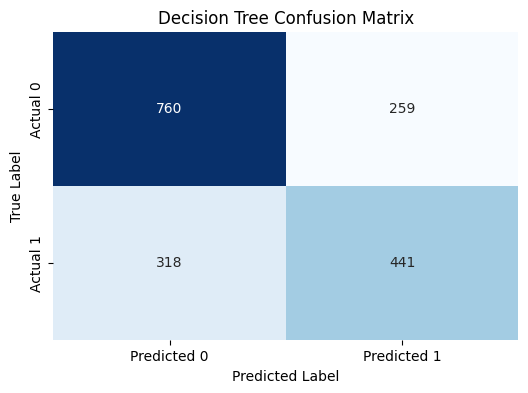

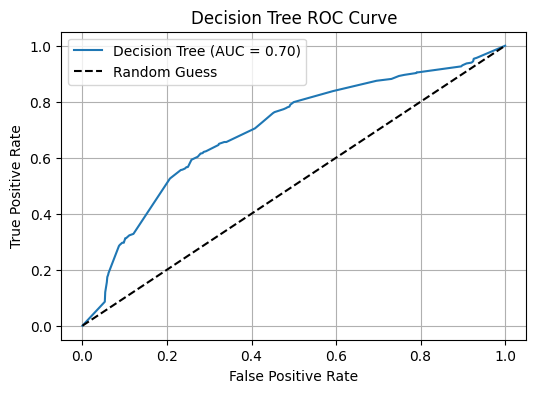

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train_clf, y_train_clf)

y_pred_dt = dt_model.predict(X_test_clf)
y_proba_dt = dt_model.predict_proba(X_test_clf)[:, 1]

accuracy_dt = accuracy_score(y_test_clf, y_pred_dt)
precision_dt = precision_score(y_test_clf, y_pred_dt)
recall_dt = recall_score(y_test_clf, y_pred_dt)
f1_dt = f1_score(y_test_clf, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test_clf, y_proba_dt)

metrics_df_clf.loc[len(metrics_df_clf)] = ['Decision Tree(10)', accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt]

print("Decision Tree Model Metrics:")
print(metrics_df_clf)

# Plot Confusion Matrix
cm_dt = confusion_matrix(y_test_clf, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test_clf, y_proba_dt)
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Decision Tree Model Metrics:
                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0     Logistic Regression  0.691226   0.677365  0.528327  0.593634  0.739611
1     SVM (Linear Kernel)  0.694601   0.707692  0.484848  0.575450  0.743635
2        SVM (RBF Kernel)  0.700225   0.710037  0.503294  0.589052  0.740447
3  K-Nearest Neighbors(5)  0.628796   0.576271  0.492754  0.531250  0.657357
4  K-Nearest Neighbors(7)  0.631046   0.582137  0.480896  0.526696  0.656863
5  K-Nearest Neighbors(3)  0.633296   0.578331  0.520422  0.547850  0.655179
6       Decision Tree(50)  0.655231   0.594560  0.604743  0.599608  0.648790
7       Decision Tree(10)  0.675478   0.630000  0.581028  0.604524  0.697508
8        Decision Tree(5)  0.688976   0.662461  0.553360  0.603015  0.719308


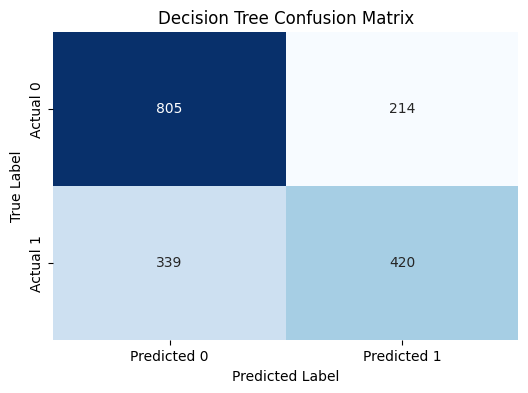

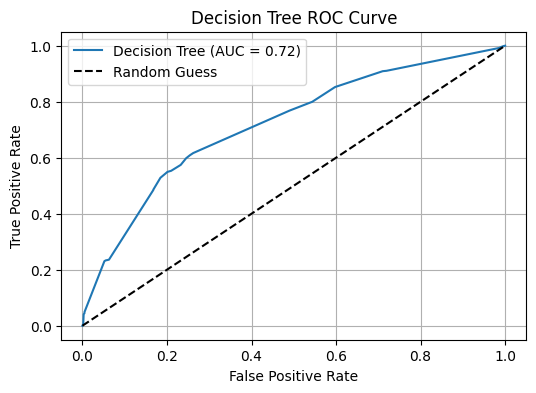

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_clf, y_train_clf)

y_pred_dt = dt_model.predict(X_test_clf)
y_proba_dt = dt_model.predict_proba(X_test_clf)[:, 1]

accuracy_dt = accuracy_score(y_test_clf, y_pred_dt)
precision_dt = precision_score(y_test_clf, y_pred_dt)
recall_dt = recall_score(y_test_clf, y_pred_dt)
f1_dt = f1_score(y_test_clf, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test_clf, y_proba_dt)

metrics_df_clf.loc[len(metrics_df_clf)] = ['Decision Tree(5)', accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt]

print("Decision Tree Model Metrics:")
print(metrics_df_clf)

# Plot Confusion Matrix
cm_dt = confusion_matrix(y_test_clf, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test_clf, y_proba_dt)
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Decision Tree Model Metrics:
                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0     Logistic Regression  0.691226   0.677365  0.528327  0.593634  0.739611
1     SVM (Linear Kernel)  0.694601   0.707692  0.484848  0.575450  0.743635
2        SVM (RBF Kernel)  0.700225   0.710037  0.503294  0.589052  0.740447
3  K-Nearest Neighbors(5)  0.628796   0.576271  0.492754  0.531250  0.657357
4  K-Nearest Neighbors(7)  0.631046   0.582137  0.480896  0.526696  0.656863
5  K-Nearest Neighbors(3)  0.633296   0.578331  0.520422  0.547850  0.655179
6       Decision Tree(50)  0.655231   0.594560  0.604743  0.599608  0.648790
7       Decision Tree(10)  0.675478   0.630000  0.581028  0.604524  0.697508
8        Decision Tree(5)  0.688976   0.662461  0.553360  0.603015  0.719308
9        Decision Tree(3)  0.685039   0.646539  0.578393  0.610570  0.713849


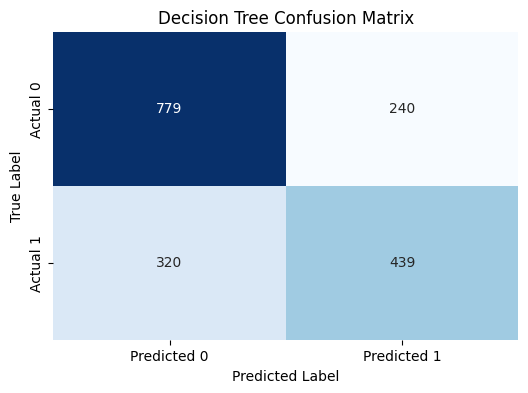

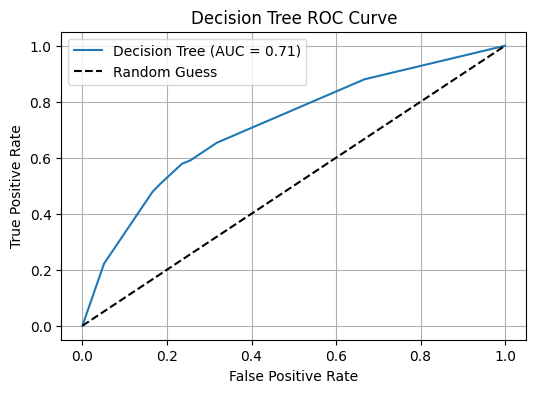

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_model.fit(X_train_clf, y_train_clf)

y_pred_dt = dt_model.predict(X_test_clf)
y_proba_dt = dt_model.predict_proba(X_test_clf)[:, 1]

accuracy_dt = accuracy_score(y_test_clf, y_pred_dt)
precision_dt = precision_score(y_test_clf, y_pred_dt)
recall_dt = recall_score(y_test_clf, y_pred_dt)
f1_dt = f1_score(y_test_clf, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test_clf, y_proba_dt)

metrics_df_clf.loc[len(metrics_df_clf)] = ['Decision Tree(3)', accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt]

print("Decision Tree Model Metrics:")
print(metrics_df_clf)

# Plot Confusion Matrix
cm_dt = confusion_matrix(y_test_clf, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test_clf, y_proba_dt)
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest

Random Forest Model Metrics:
                     Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      Logistic Regression  0.691226   0.677365  0.528327  0.593634  0.739611
1      SVM (Linear Kernel)  0.694601   0.707692  0.484848  0.575450  0.743635
2         SVM (RBF Kernel)  0.700225   0.710037  0.503294  0.589052  0.740447
3   K-Nearest Neighbors(5)  0.628796   0.576271  0.492754  0.531250  0.657357
4   K-Nearest Neighbors(7)  0.631046   0.582137  0.480896  0.526696  0.656863
5   K-Nearest Neighbors(3)  0.633296   0.578331  0.520422  0.547850  0.655179
6        Decision Tree(50)  0.655231   0.594560  0.604743  0.599608  0.648790
7        Decision Tree(10)  0.675478   0.630000  0.581028  0.604524  0.697508
8         Decision Tree(5)  0.688976   0.662461  0.553360  0.603015  0.719308
9         Decision Tree(3)  0.685039   0.646539  0.578393  0.610570  0.713849
10           Random Forest  0.724409   0.705972  0.607378  0.652975  0.792650


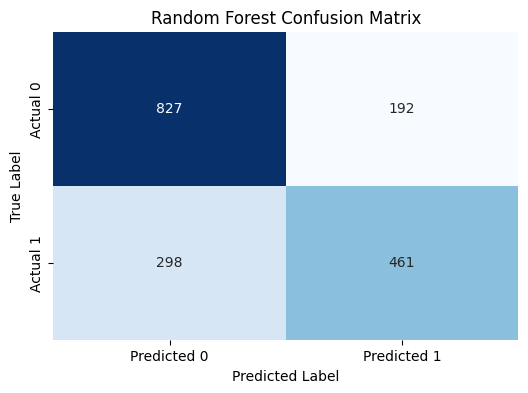

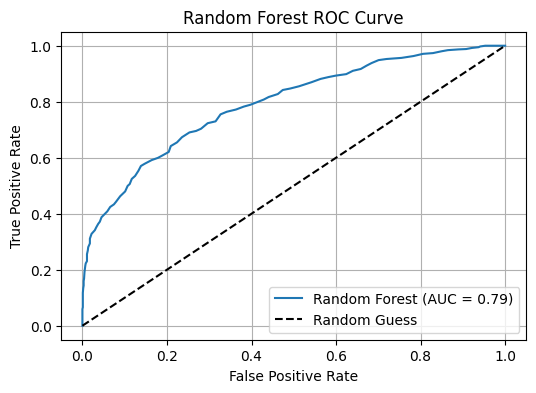

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_clf, y_train_clf)

y_pred_rf = rf_model.predict(X_test_clf)
y_proba_rf = rf_model.predict_proba(X_test_clf)[:, 1]

accuracy_rf = accuracy_score(y_test_clf, y_pred_rf)
precision_rf = precision_score(y_test_clf, y_pred_rf)
recall_rf = recall_score(y_test_clf, y_pred_rf)
f1_rf = f1_score(y_test_clf, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test_clf, y_proba_rf)

metrics_df_clf.loc[len(metrics_df_clf)] = ['Random Forest', accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]

print("Random Forest Model Metrics:")
print(metrics_df_clf)

# Plot Confusion Matrix
cm_rf = confusion_matrix(y_test_clf, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_clf, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## Linear Discriminant Analysis (LDA)


Linear Discriminant Analysis Model Metrics:
                     Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      Logistic Regression  0.691226   0.677365  0.528327  0.593634  0.739611
1      SVM (Linear Kernel)  0.694601   0.707692  0.484848  0.575450  0.743635
2         SVM (RBF Kernel)  0.700225   0.710037  0.503294  0.589052  0.740447
3   K-Nearest Neighbors(5)  0.628796   0.576271  0.492754  0.531250  0.657357
4   K-Nearest Neighbors(7)  0.631046   0.582137  0.480896  0.526696  0.656863
5   K-Nearest Neighbors(3)  0.633296   0.578331  0.520422  0.547850  0.655179
6        Decision Tree(50)  0.655231   0.594560  0.604743  0.599608  0.648790
7        Decision Tree(10)  0.675478   0.630000  0.581028  0.604524  0.697508
8         Decision Tree(5)  0.688976   0.662461  0.553360  0.603015  0.719308
9         Decision Tree(3)  0.685039   0.646539  0.578393  0.610570  0.713849
10           Random Forest  0.724409   0.705972  0.607378  0.652975  0.792650
11                  

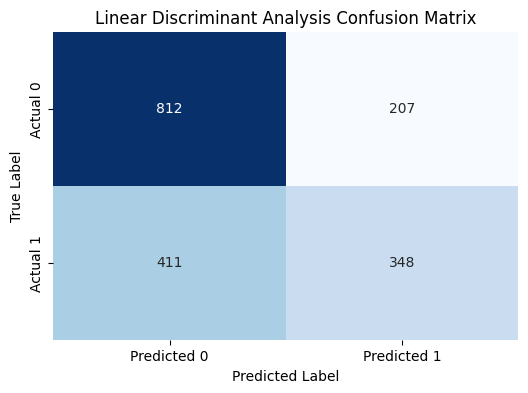

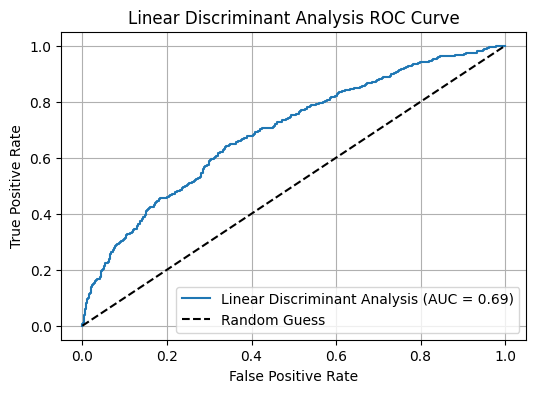

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_clf, y_train_clf)

y_pred_lda = lda_model.predict(X_test_clf)
y_proba_lda = lda_model.predict_proba(X_test_clf)[:, 1]

accuracy_lda = accuracy_score(y_test_clf, y_pred_lda)
precision_lda = precision_score(y_test_clf, y_pred_lda)
recall_lda = recall_score(y_test_clf, y_pred_lda)
f1_lda = f1_score(y_test_clf, y_pred_lda)
roc_auc_lda = roc_auc_score(y_test_clf, y_proba_lda)

metrics_df_clf.loc[len(metrics_df_clf)] = ['LDA', accuracy_lda, precision_lda, recall_lda, f1_lda, roc_auc_lda]

print("Linear Discriminant Analysis Model Metrics:")
print(metrics_df_clf)

# Plot Confusion Matrix
cm_lda = confusion_matrix(y_test_clf, y_pred_lda)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Linear Discriminant Analysis Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
fpr_lda, tpr_lda, _ = roc_curve(y_test_clf, y_proba_lda)
plt.figure(figsize=(6, 4))
plt.plot(fpr_lda, tpr_lda, label=f'Linear Discriminant Analysis (AUC = {roc_auc_lda:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Discriminant Analysis ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## Compare the performance of all models

In [ ]:
print("Comparison of All Classification Models' Performance:")
print(metrics_df_clf.sort_values(by='ROC-AUC', ascending=False))

Comparison of All Classification Models' Performance:
                          Model  Accuracy  Precision    Recall  F1-Score  \
5                 Random Forest  0.724409   0.705972  0.607378  0.652975   
1           SVM (Linear Kernel)  0.694601   0.707692  0.484848  0.575450   
2              SVM (RBF Kernel)  0.700225   0.710037  0.503294  0.589052   
0           Logistic Regression  0.691226   0.677365  0.528327  0.593634   
6  Linear Discriminant Analysis  0.652418   0.627027  0.458498  0.529680   
3           K-Nearest Neighbors  0.628796   0.576271  0.492754  0.531250   
4                 Decision Tree  0.655231   0.594560  0.604743  0.599608   

    ROC-AUC  
5  0.792650  
1  0.743635  
2  0.740447  
0  0.739611  
6  0.694588  
3  0.657357  
4  0.648790  


## Question 1
### Choose the best classification metric for your dataset and justify.


---



For this binary classification problem, **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)** is the best classification metric.


1.  **Imbalanced Classes**: While not severely imbalanced, there is a slight imbalance in the binary classes. Accuracy can be misleading in such cases if a model simply predicts the majority class. ROC-AUC is robust to class imbalance because it considers all possible classification thresholds and summarizes the trade-off between the true positive rate and false positive rate.

2.  **Performance Across Thresholds**: ROC-AUC doesn't rely on a single classification threshold. This is crucial as the "best" threshold might depend on the specific business context or cost of different types of errors. ROC-AUC provides a comprehensive measure of a model's performance regardless of the chosen threshold.

3.  **Distinguishing Power**: An AUC score indicates the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative instance. A higher AUC suggests the model is better at distinguishing between the two classes.

4.  **Interpretability**: AUC scores are easily interpretable: 0.5 suggests a random classifier, while 1.0 indicates a perfect classifier. For this dataset, Random Forest has the highest ROC-AUC at 0.79, indicating it has the best discriminative power among the evaluated models.

5.  **Comparison to Other Metrics**: While Accuracy, Precision, Recall, and F1-Score are important, they are all threshold-dependent. For instance, a high precision might come at the cost of low recall, or vice-versa. F1-score provides a balance, but still for a specific threshold. ROC-AUC offers a more global view of the model's performance without having to commit to a single operating point.

## Question 2

### Explain 3 techniques to regularize the training process for decision trees.


---



1.  **Limiting the Maximum Depth (`max_depth`):** This is one of the most straightforward and effective ways to regularize a decision tree. By setting a maximum depth, we explicitly restrict how many levels the tree can have. A shallower tree means fewer splits and less complexity, preventing the model from learning overly specific patterns from the training data that might not generalize to unseen data.

2.  **Setting a Minimum Number of Samples per Leaf (`min_samples_leaf`):** This parameter specifies the minimum number of samples that a leaf node must contain. If a split would result in a leaf node having fewer samples than `min_samples_leaf`, that split is disallowed. This prevents the tree from creating leaf nodes that are too small and thus highly specific to the training data. Larger values of `min_samples_leaf` lead to more generalized (and hence more regularized) trees, as they force splits to be meaningful for a larger group of samples.

3.  **Setting a Minimum Number of Samples Required to Split an Internal Node (`min_samples_split`):** This parameter defines the minimum number of samples an internal node must have before it can be considered for splitting. Similar to `min_samples_leaf`, this technique prevents the tree from making splits on very small groups of samples, which could lead to overfitting. If a node has fewer samples than `min_samples_split`, it becomes a leaf node and no further splits are made from it. Setting a higher `min_samples_split` value can prevent the tree from capturing noise in the training data.

## Question 3
### Compare Linear SVM vs Kernel SVM.


---



**Linear SVM** works best when the data is linearly separable or when the number of features is very high (like text data). It is fast, scalable, and less prone to overfitting.

**Kernel SVM** is used when the data has complex, non-linear patterns. By applying kernels (like RBF or polynomial), it can create non-linear boundaries and achieve much better accuracy on complicated datasets, but it is slower and less scalable.


# 3. Multiclass Classification Methods

## Preparing Data for Multiclass Classification

In [49]:
y_multiclass = pd.qcut(y, q=4, labels=False)

print("Value counts for y_multiclass:")
print(y_multiclass.value_counts())

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_multiclass, test_size=0.2, random_state=42)

print(f"\nX_train_multi shape: {X_train_multi.shape}")
print(f"X_test_multi shape: {X_test_multi.shape}")
print(f"y_train_multi shape: {y_train_multi.shape}")
print(f"y_test_multi shape: {y_test_multi.shape}")

Value counts for y_multiclass:
Rating
1    2559
0    2483
2    2007
3    1838
Name: count, dtype: int64

X_train_multi shape: (7109, 98)
X_test_multi shape: (1778, 98)
y_train_multi shape: (7109,)
y_test_multi shape: (1778,)


## Multiclass SVM


In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
import pandas as pd

svm_multi_model = SVC(kernel='linear', decision_function_shape='ovr', probability=True, random_state=42)
svm_multi_model.fit(X_train_multi, y_train_multi)

y_pred_svm_multi = svm_multi_model.predict(X_test_multi)
y_proba_svm_multi = svm_multi_model.predict_proba(X_test_multi)

accuracy_svm_multi = accuracy_score(y_test_multi, y_pred_svm_multi)
precision_svm_multi = precision_score(y_test_multi, y_pred_svm_multi, average='weighted')
recall_svm_multi = recall_score(y_test_multi, y_pred_svm_multi, average='weighted')
f1_svm_multi = f1_score(y_test_multi, y_pred_svm_multi, average='weighted')
logloss_svm_multi = log_loss(y_test_multi, y_proba_svm_multi)

metrics_df_multi = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)', 'Log Loss'])

metrics_df_multi.loc[len(metrics_df_multi)] = ['Multiclass SVM (Linear Kernel)', accuracy_svm_multi, precision_svm_multi, recall_svm_multi, f1_svm_multi, logloss_svm_multi]

print("Multiclass SVM (Linear Kernel) Model Metrics:")
print(metrics_df_multi)

Multiclass SVM (Linear Kernel) Model Metrics:
                            Model  Accuracy  Precision (Weighted)  \
0  Multiclass SVM (Linear Kernel)  0.426884              0.439037   

   Recall (Weighted)  F1-Score (Weighted)  Log Loss  
0           0.426884             0.404397  1.242326  


## Multiclass Logistic Regression (One-vs-Rest)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.multiclass import OneVsRestClassifier

lr_ovr_model = OneVsRestClassifier(LogisticRegression(solver='liblinear', max_iter=1000, random_state=42))
lr_ovr_model.fit(X_train_multi, y_train_multi)

y_pred_lr_ovr = lr_ovr_model.predict(X_test_multi)
y_proba_lr_ovr = lr_ovr_model.predict_proba(X_test_multi)

accuracy_lr_ovr = accuracy_score(y_test_multi, y_pred_lr_ovr)
precision_lr_ovr = precision_score(y_test_multi, y_pred_lr_ovr, average='weighted')
recall_lr_ovr = recall_score(y_test_multi, y_pred_lr_ovr, average='weighted')
f1_lr_ovr = f1_score(y_test_multi, y_pred_lr_ovr, average='weighted')
logloss_lr_ovr = log_loss(y_test_multi, y_proba_lr_ovr)

metrics_df_multi.loc[len(metrics_df_multi)] = ['Multiclass Logistic Regression (OvR)', accuracy_lr_ovr, precision_lr_ovr, recall_lr_ovr, f1_lr_ovr, logloss_lr_ovr]

print("Multiclass Logistic Regression (One-vs-Rest) Model Metrics:")
print(metrics_df_multi)

Multiclass Logistic Regression (One-vs-Rest) Model Metrics:
                                  Model  Accuracy  Precision (Weighted)  \
0        Multiclass SVM (Linear Kernel)  0.426884              0.439037   
1  Multiclass Logistic Regression (OvR)  0.432508              0.429158   

   Recall (Weighted)  F1-Score (Weighted)  Log Loss  
0           0.426884             0.404397  1.242326  
1           0.432508             0.416321  1.242416  


## Multiclass Logistic Regression (Multinomial)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# The default multi_class option is multinomial
lr_multi_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
lr_multi_model.fit(X_train_multi, y_train_multi)

y_pred_lr_multi = lr_multi_model.predict(X_test_multi)
y_proba_lr_multi = lr_multi_model.predict_proba(X_test_multi)

accuracy_lr_multi = accuracy_score(y_test_multi, y_pred_lr_multi)
precision_lr_multi = precision_score(y_test_multi, y_pred_lr_multi, average='weighted', zero_division=0)
recall_lr_multi = recall_score(y_test_multi, y_pred_lr_multi, average='weighted', zero_division=0)
f1_lr_multi = f1_score(y_test_multi, y_pred_lr_multi, average='weighted', zero_division=0)
logloss_lr_multi = log_loss(y_test_multi, y_proba_lr_multi)

metrics_df_multi.loc[len(metrics_df_multi)] = ['Multiclass Logistic Regression (Multinomial)', accuracy_lr_multi, precision_lr_multi, recall_lr_multi, f1_lr_multi, logloss_lr_multi]

print("Multiclass Logistic Regression (Multinomial) Model Metrics:")
print(metrics_df_multi)


Multiclass Logistic Regression (Multinomial) Model Metrics:
                                          Model  Accuracy  \
0                Multiclass SVM (Linear Kernel)  0.426884   
1          Multiclass Logistic Regression (OvR)  0.432508   
2  Multiclass Logistic Regression (Multinomial)  0.431384   

   Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Log Loss  
0              0.439037           0.426884             0.404397  1.242326  
1              0.429158           0.432508             0.416321  1.242416  
2              0.427223           0.431384             0.417913  1.240994  


## Multiclass KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

knn_multi_model = KNeighborsClassifier(n_neighbors=5)
knn_multi_model.fit(X_train_multi, y_train_multi)

y_pred_knn_multi = knn_multi_model.predict(X_test_multi)
y_proba_knn_multi = knn_multi_model.predict_proba(X_test_multi)

accuracy_knn_multi = accuracy_score(y_test_multi, y_pred_knn_multi)
precision_knn_multi = precision_score(y_test_multi, y_pred_knn_multi, average='weighted')
recall_knn_multi = recall_score(y_test_multi, y_pred_knn_multi, average='weighted')
f1_knn_multi = f1_score(y_test_multi, y_pred_knn_multi, average='weighted')
logloss_knn_multi = log_loss(y_test_multi, y_proba_knn_multi)

metrics_df_multi.loc[len(metrics_df_multi)] = ['Multiclass K-Nearest Neighbors', accuracy_knn_multi, precision_knn_multi, recall_knn_multi, f1_knn_multi, logloss_knn_multi]

print("Multiclass K-Nearest Neighbors Model Metrics:")
print(metrics_df_multi)

Multiclass K-Nearest Neighbors Model Metrics:
                                          Model  Accuracy  \
0                Multiclass SVM (Linear Kernel)  0.426884   
1          Multiclass Logistic Regression (OvR)  0.432508   
2  Multiclass Logistic Regression (Multinomial)  0.431384   
3                Multiclass K-Nearest Neighbors  0.388076   

   Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Log Loss  
0              0.439037           0.426884             0.404397  1.242326  
1              0.429158           0.432508             0.416321  1.242416  
2              0.427223           0.431384             0.417913  1.240994  
3              0.388069           0.388076             0.380122  7.473509  


## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

dt_multi_model = DecisionTreeClassifier(random_state=42)
dt_multi_model.fit(X_train_multi, y_train_multi)

y_pred_dt_multi = dt_multi_model.predict(X_test_multi)
y_proba_dt_multi = dt_multi_model.predict_proba(X_test_multi)

accuracy_dt_multi = accuracy_score(y_test_multi, y_pred_dt_multi)
precision_dt_multi = precision_score(y_test_multi, y_pred_dt_multi, average='weighted')
recall_dt_multi = recall_score(y_test_multi, y_pred_dt_multi, average='weighted')
f1_dt_multi = f1_score(y_test_multi, y_pred_dt_multi, average='weighted')
logloss_dt_multi = log_loss(y_test_multi, y_proba_dt_multi)

metrics_df_multi.loc[len(metrics_df_multi)] = ['Multiclass Decision Tree', accuracy_dt_multi, precision_dt_multi, recall_dt_multi, f1_dt_multi, logloss_dt_multi]

print("Multiclass Decision Tree Model Metrics:")
print(metrics_df_multi)

Multiclass Decision Tree Model Metrics:
                                          Model  Accuracy  \
0                Multiclass SVM (Linear Kernel)  0.426884   
1          Multiclass Logistic Regression (OvR)  0.432508   
2  Multiclass Logistic Regression (Multinomial)  0.431384   
3                Multiclass K-Nearest Neighbors  0.388076   
4                      Multiclass Decision Tree  0.442632   

   Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)   Log Loss  
0              0.439037           0.426884             0.404397   1.242326  
1              0.429158           0.432508             0.416321   1.242416  
2              0.427223           0.431384             0.417913   1.240994  
3              0.388069           0.388076             0.380122   7.473509  
4              0.442461           0.442632             0.442419  20.089573  


## XGBoost Classifier

In [55]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

xgb_multi_model = xgb.XGBClassifier(objective='multi:softprob', num_class=4, eval_metric='mlogloss', random_state=42)
xgb_multi_model.fit(X_train_multi, y_train_multi)

y_pred_xgb_multi = xgb_multi_model.predict(X_test_multi)
y_proba_xgb_multi = xgb_multi_model.predict_proba(X_test_multi)

accuracy_xgb_multi = accuracy_score(y_test_multi, y_pred_xgb_multi)
precision_xgb_multi = precision_score(y_test_multi, y_pred_xgb_multi, average='weighted')
recall_xgb_multi = recall_score(y_test_multi, y_pred_xgb_multi, average='weighted')
f1_xgb_multi = f1_score(y_test_multi, y_pred_xgb_multi, average='weighted')
logloss_xgb_multi = log_loss(y_test_multi, y_proba_xgb_multi)

metrics_df_multi.loc[len(metrics_df_multi)] = ['Multiclass XGBoost', accuracy_xgb_multi, precision_xgb_multi, recall_xgb_multi, f1_xgb_multi, logloss_xgb_multi]

print("Multiclass XGBoost Model Metrics:")
print(metrics_df_multi)

Multiclass XGBoost Model Metrics:
                                          Model  Accuracy  \
0                Multiclass SVM (Linear Kernel)  0.426884   
1          Multiclass Logistic Regression (OvR)  0.432508   
2  Multiclass Logistic Regression (Multinomial)  0.431384   
3                Multiclass K-Nearest Neighbors  0.388076   
4                      Multiclass Decision Tree  0.442632   
5                            Multiclass XGBoost  0.471879   

   Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)   Log Loss  
0              0.439037           0.426884             0.404397   1.242326  
1              0.429158           0.432508             0.416321   1.242416  
2              0.427223           0.431384             0.417913   1.240994  
3              0.388069           0.388076             0.380122   7.473509  
4              0.442461           0.442632             0.442419  20.089573  
5              0.470256           0.471879             0.469258   1.177404  

## LightGBM Classifier

In [56]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

lgbm_multi_model = lgb.LGBMClassifier(objective='multiclass', num_class=4, random_state=42)
lgbm_multi_model.fit(X_train_multi, y_train_multi)

y_pred_lgbm_multi = lgbm_multi_model.predict(X_test_multi)
y_proba_lgbm_multi = lgbm_multi_model.predict_proba(X_test_multi)

accuracy_lgbm_multi = accuracy_score(y_test_multi, y_pred_lgbm_multi)
precision_lgbm_multi = precision_score(y_test_multi, y_pred_lgbm_multi, average='weighted')
recall_lgbm_multi = recall_score(y_test_multi, y_pred_lgbm_multi, average='weighted')
f1_lgbm_multi = f1_score(y_test_multi, y_pred_lgbm_multi, average='weighted')
logloss_lgbm_multi = log_loss(y_test_multi, y_proba_lgbm_multi)

metrics_df_multi.loc[len(metrics_df_multi)] = ['Multiclass LightGBM', accuracy_lgbm_multi, precision_lgbm_multi, recall_lgbm_multi, f1_lgbm_multi, logloss_lgbm_multi]

print("Multiclass LightGBM Model Metrics:")
print(metrics_df_multi)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 7109, number of used features: 96
[LightGBM] [Info] Start training from score -1.270718
[LightGBM] [Info] Start training from score -1.254312
[LightGBM] [Info] Start training from score -1.485127
[LightGBM] [Info] Start training from score -1.572026
Multiclass LightGBM Model Metrics:
                                          Model  Accuracy  \
0                Multiclass SVM (Linear Kernel)  0.426884   
1          Multiclass Logistic Regression (OvR)  0.432508   
2  Multiclass Logistic Regression (Multinomial)  0.431384   
3                Multiclass K-Nearest Neighbors  0.388076   
4           

## AdaBoost Classifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

ada_multi_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3, random_state=42), n_estimators=50, random_state=42)
ada_multi_model.fit(X_train_multi, y_train_multi)

y_pred_ada_multi = ada_multi_model.predict(X_test_multi)
y_proba_ada_multi = ada_multi_model.predict_proba(X_test_multi)

accuracy_ada_multi = accuracy_score(y_test_multi, y_pred_ada_multi)
precision_ada_multi = precision_score(y_test_multi, y_pred_ada_multi, average='weighted')
recall_ada_multi = recall_score(y_test_multi, y_pred_ada_multi, average='weighted')
f1_ada_multi = f1_score(y_test_multi, y_pred_ada_multi, average='weighted')
logloss_ada_multi = log_loss(y_test_multi, y_proba_ada_multi)

metrics_df_multi.loc[len(metrics_df_multi)] = ['Multiclass AdaBoost', accuracy_ada_multi, precision_ada_multi, recall_ada_multi, f1_ada_multi, logloss_ada_multi]

print("Multiclass AdaBoost Model Metrics:")
print(metrics_df_multi)

Multiclass AdaBoost Model Metrics:
                                          Model  Accuracy  \
0                Multiclass SVM (Linear Kernel)  0.426884   
1          Multiclass Logistic Regression (OvR)  0.432508   
2  Multiclass Logistic Regression (Multinomial)  0.431384   
3                Multiclass K-Nearest Neighbors  0.388076   
4                      Multiclass Decision Tree  0.442632   
5                            Multiclass XGBoost  0.471879   
6                           Multiclass LightGBM  0.476940   
7                           Multiclass AdaBoost  0.444319   

   Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)   Log Loss  
0              0.439037           0.426884             0.404397   1.242326  
1              0.429158           0.432508             0.416321   1.242416  
2              0.427223           0.431384             0.417913   1.240994  
3              0.388069           0.388076             0.380122   7.473509  
4              0.442461       

## CatBoost Classifier


In [58]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.4 MB/s eta 0:00:00


In [59]:
import catboost as cb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

cat_multi_model = cb.CatBoostClassifier(iterations=100,  # Number of boosting rounds
                                        loss_function='MultiClass', # For multiclass classification
                                        random_seed=42,
                                        verbose=False) # Suppress verbose output
cat_multi_model.fit(X_train_multi, y_train_multi)

y_pred_cat_multi = cat_multi_model.predict(X_test_multi)
y_proba_cat_multi = cat_multi_model.predict_proba(X_test_multi)

accuracy_cat_multi = accuracy_score(y_test_multi, y_pred_cat_multi)
precision_cat_multi = precision_score(y_test_multi, y_pred_cat_multi, average='weighted')
recall_cat_multi = recall_score(y_test_multi, y_pred_cat_multi, average='weighted')
f1_cat_multi = f1_score(y_test_multi, y_pred_cat_multi, average='weighted')
logloss_cat_multi = log_loss(y_test_multi, y_proba_cat_multi)

metrics_df_multi.loc[len(metrics_df_multi)] = ['Multiclass CatBoost', accuracy_cat_multi, precision_cat_multi, recall_cat_multi, f1_cat_multi, logloss_cat_multi]

print("Multiclass CatBoost Model Metrics:")
print(metrics_df_multi)

Multiclass CatBoost Model Metrics:
                                          Model  Accuracy  \
0                Multiclass SVM (Linear Kernel)  0.426884   
1          Multiclass Logistic Regression (OvR)  0.432508   
2  Multiclass Logistic Regression (Multinomial)  0.431384   
3                Multiclass K-Nearest Neighbors  0.388076   
4                      Multiclass Decision Tree  0.442632   
5                            Multiclass XGBoost  0.471879   
6                           Multiclass LightGBM  0.476940   
7                           Multiclass AdaBoost  0.444319   
8                           Multiclass CatBoost  0.476378   

   Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)   Log Loss  
0              0.439037           0.426884             0.404397   1.242326  
1              0.429158           0.432508             0.416321   1.242416  
2              0.427223           0.431384             0.417913   1.240994  
3              0.388069           0.388076    

## Compare the performance of all models

In [60]:
print("Comparison of All Multiclass Classification Models' Performance:")
print(metrics_df_multi.sort_values(by='Accuracy', ascending=False))

Comparison of All Multiclass Classification Models' Performance:
                                          Model  Accuracy  \
6                           Multiclass LightGBM  0.476940   
8                           Multiclass CatBoost  0.476378   
5                            Multiclass XGBoost  0.471879   
7                           Multiclass AdaBoost  0.444319   
4                      Multiclass Decision Tree  0.442632   
1          Multiclass Logistic Regression (OvR)  0.432508   
2  Multiclass Logistic Regression (Multinomial)  0.431384   
0                Multiclass SVM (Linear Kernel)  0.426884   
3                Multiclass K-Nearest Neighbors  0.388076   

   Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)   Log Loss  
6              0.474771           0.476940             0.473514   1.154755  
8              0.474431           0.476378             0.473012   1.175744  
5              0.470256           0.471879             0.469258   1.177404  
7              0

## Evaluate Multiclass Models

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, hamming_loss, cohen_kappa_score
import pandas as pd

all_multi_metrics = []

classes = sorted(y_multiclass.unique())

# --- 1. Multiclass SVM (Linear Kernel) ---
model_name = 'Multiclass SVM (Linear Kernel)'
y_pred = svm_multi_model.predict(X_test_multi)
y_proba = svm_multi_model.predict_proba(X_test_multi)

metrics = {
    'Model': model_name,
    'Accuracy': accuracy_score(y_test_multi, y_pred),
    'Precision (Weighted)': precision_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Precision (Macro)': precision_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Precision (Micro)': precision_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Precision (Per-Class)': precision_score(y_test_multi, y_pred, average=None, zero_division=0),
    'Recall (Weighted)': recall_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Recall (Macro)': recall_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Recall (Micro)': recall_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Recall (Per-Class)': recall_score(y_test_multi, y_pred, average=None, zero_division=0),
    'F1-Score (Weighted)': f1_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'F1-Score (Macro)': f1_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'F1-Score (Micro)': f1_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Log Loss': log_loss(y_test_multi, y_proba),
    'Hamming Loss': hamming_loss(y_test_multi, y_pred),
    'Cohen Kappa': cohen_kappa_score(y_test_multi, y_pred)
}
all_multi_metrics.append(metrics)

# --- 2. Multiclass Logistic Regression (One-vs-Rest) ---
model_name = 'Multiclass Logistic Regression (OvR)'
y_pred = lr_ovr_model.predict(X_test_multi)
y_proba = lr_ovr_model.predict_proba(X_test_multi)

metrics = {
    'Model': model_name,
    'Accuracy': accuracy_score(y_test_multi, y_pred),
    'Precision (Weighted)': precision_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Precision (Macro)': precision_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Precision (Micro)': precision_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Precision (Per-Class)': precision_score(y_test_multi, y_pred, average=None, zero_division=0),
    'Recall (Weighted)': recall_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Recall (Macro)': recall_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Recall (Micro)': recall_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Recall (Per-Class)': recall_score(y_test_multi, y_pred, average=None, zero_division=0),
    'F1-Score (Weighted)': f1_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'F1-Score (Macro)': f1_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'F1-Score (Micro)': f1_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Log Loss': log_loss(y_test_multi, y_proba),
    'Hamming Loss': hamming_loss(y_test_multi, y_pred),
    'Cohen Kappa': cohen_kappa_score(y_test_multi, y_pred)
}
all_multi_metrics.append(metrics)

# --- 3. Multiclass Logistic Regression (Multinomial) ---
model_name = 'Multiclass Logistic Regression (Multinomial)'
y_pred = lr_multi_model.predict(X_test_multi)
y_proba = lr_multi_model.predict_proba(X_test_multi)

metrics = {
    'Model': model_name,
    'Accuracy': accuracy_score(y_test_multi, y_pred),
    'Precision (Weighted)': precision_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Precision (Macro)': precision_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Precision (Micro)': precision_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Precision (Per-Class)': precision_score(y_test_multi, y_pred, average=None, zero_division=0),
    'Recall (Weighted)': recall_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Recall (Macro)': recall_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Recall (Micro)': recall_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Recall (Per-Class)': recall_score(y_test_multi, y_pred, average=None, zero_division=0),
    'F1-Score (Weighted)': f1_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'F1-Score (Macro)': f1_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'F1-Score (Micro)': f1_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Log Loss': log_loss(y_test_multi, y_proba),
    'Hamming Loss': hamming_loss(y_test_multi, y_pred),
    'Cohen Kappa': cohen_kappa_score(y_test_multi, y_pred)
}
all_multi_metrics.append(metrics)


# --- 4. Multiclass KNN ---
model_name = 'Multiclass K-Nearest Neighbors'
y_pred = knn_multi_model.predict(X_test_multi)
y_proba = knn_multi_model.predict_proba(X_test_multi)

metrics = {
    'Model': model_name,
    'Accuracy': accuracy_score(y_test_multi, y_pred),
    'Precision (Weighted)': precision_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Precision (Macro)': precision_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Precision (Micro)': precision_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Precision (Per-Class)': precision_score(y_test_multi, y_pred, average=None, zero_division=0),
    'Recall (Weighted)': recall_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Recall (Macro)': recall_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Recall (Micro)': recall_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Recall (Per-Class)': recall_score(y_test_multi, y_pred, average=None, zero_division=0),
    'F1-Score (Weighted)': f1_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'F1-Score (Macro)': f1_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'F1-Score (Micro)': f1_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Log Loss': log_loss(y_test_multi, y_proba),
    'Hamming Loss': hamming_loss(y_test_multi, y_pred),
    'Cohen Kappa': cohen_kappa_score(y_test_multi, y_pred)
}
all_multi_metrics.append(metrics)

# --- 5. Multiclass Decision Tree ---
model_name = 'Multiclass Decision Tree'
y_pred = dt_multi_model.predict(X_test_multi)
y_proba = dt_multi_model.predict_proba(X_test_multi)

metrics = {
    'Model': model_name,
    'Accuracy': accuracy_score(y_test_multi, y_pred),
    'Precision (Weighted)': precision_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Precision (Macro)': precision_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Precision (Micro)': precision_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Precision (Per-Class)': precision_score(y_test_multi, y_pred, average=None, zero_division=0),
    'Recall (Weighted)': recall_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Recall (Macro)': recall_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Recall (Micro)': recall_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Recall (Per-Class)': recall_score(y_test_multi, y_pred, average=None, zero_division=0),
    'F1-Score (Weighted)': f1_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'F1-Score (Macro)': f1_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'F1-Score (Micro)': f1_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Log Loss': log_loss(y_test_multi, y_proba),
    'Hamming Loss': hamming_loss(y_test_multi, y_pred),
    'Cohen Kappa': cohen_kappa_score(y_test_multi, y_pred)
}
all_multi_metrics.append(metrics)

# --- 6. Multiclass XGBoost ---
model_name = 'Multiclass XGBoost'
y_pred = xgb_multi_model.predict(X_test_multi)
y_proba = xgb_multi_model.predict_proba(X_test_multi)

metrics = {
    'Model': model_name,
    'Accuracy': accuracy_score(y_test_multi, y_pred),
    'Precision (Weighted)': precision_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Precision (Macro)': precision_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Precision (Micro)': precision_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Precision (Per-Class)': precision_score(y_test_multi, y_pred, average=None, zero_division=0),
    'Recall (Weighted)': recall_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Recall (Macro)': recall_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Recall (Micro)': recall_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Recall (Per-Class)': recall_score(y_test_multi, y_pred, average=None, zero_division=0),
    'F1-Score (Weighted)': f1_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'F1-Score (Macro)': f1_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'F1-Score (Micro)': f1_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Log Loss': log_loss(y_test_multi, y_proba),
    'Hamming Loss': hamming_loss(y_test_multi, y_pred),
    'Cohen Kappa': cohen_kappa_score(y_test_multi, y_pred)
}
all_multi_metrics.append(metrics)

# --- 7. Multiclass LightGBM ---
model_name = 'Multiclass LightGBM'
y_pred = lgbm_multi_model.predict(X_test_multi)
y_proba = lgbm_multi_model.predict_proba(X_test_multi)

metrics = {
    'Model': model_name,
    'Accuracy': accuracy_score(y_test_multi, y_pred),
    'Precision (Weighted)': precision_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Precision (Macro)': precision_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Precision (Micro)': precision_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Precision (Per-Class)': precision_score(y_test_multi, y_pred, average=None, zero_division=0),
    'Recall (Weighted)': recall_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Recall (Macro)': recall_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Recall (Micro)': recall_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Recall (Per-Class)': recall_score(y_test_multi, y_pred, average=None, zero_division=0),
    'F1-Score (Weighted)': f1_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'F1-Score (Macro)': f1_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'F1-Score (Micro)': f1_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Log Loss': log_loss(y_test_multi, y_proba),
    'Hamming Loss': hamming_loss(y_test_multi, y_pred),
    'Cohen Kappa': cohen_kappa_score(y_test_multi, y_pred)
}
all_multi_metrics.append(metrics)

# --- 8. Multiclass AdaBoost ---
model_name = 'Multiclass AdaBoost'
y_pred = ada_multi_model.predict(X_test_multi)
y_proba = ada_multi_model.predict_proba(X_test_multi)

metrics = {
    'Model': model_name,
    'Accuracy': accuracy_score(y_test_multi, y_pred),
    'Precision (Weighted)': precision_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Precision (Macro)': precision_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Precision (Micro)': precision_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Precision (Per-Class)': precision_score(y_test_multi, y_pred, average=None, zero_division=0),
    'Recall (Weighted)': recall_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Recall (Macro)': recall_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Recall (Micro)': recall_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Recall (Per-Class)': recall_score(y_test_multi, y_pred, average=None, zero_division=0),
    'F1-Score (Weighted)': f1_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'F1-Score (Macro)': f1_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'F1-Score (Micro)': f1_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Log Loss': log_loss(y_test_multi, y_proba),
    'Hamming Loss': hamming_loss(y_test_multi, y_pred),
    'Cohen Kappa': cohen_kappa_score(y_test_multi, y_pred)
}
all_multi_metrics.append(metrics)

# --- 9. Multiclass CatBoost ---
model_name = 'Multiclass CatBoost'
y_pred = cat_multi_model.predict(X_test_multi)
y_proba = cat_multi_model.predict_proba(X_test_multi)

metrics = {
    'Model': model_name,
    'Accuracy': accuracy_score(y_test_multi, y_pred),
    'Precision (Weighted)': precision_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Precision (Macro)': precision_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Precision (Micro)': precision_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Precision (Per-Class)': precision_score(y_test_multi, y_pred, average=None, zero_division=0),
    'Recall (Weighted)': recall_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'Recall (Macro)': recall_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'Recall (Micro)': recall_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Recall (Per-Class)': recall_score(y_test_multi, y_pred, average=None, zero_division=0),
    'F1-Score (Weighted)': f1_score(y_test_multi, y_pred, average='weighted', zero_division=0),
    'F1-Score (Macro)': f1_score(y_test_multi, y_pred, average='macro', zero_division=0),
    'F1-Score (Micro)': f1_score(y_test_multi, y_pred, average='micro', zero_division=0),
    'Log Loss': log_loss(y_test_multi, y_proba),
    'Hamming Loss': hamming_loss(y_test_multi, y_pred),
    'Cohen Kappa': cohen_kappa_score(y_test_multi, y_pred)
}
all_multi_metrics.append(metrics)

metrics_df_multi_summary = pd.DataFrame(all_multi_metrics)

# Print the DataFrame containing the model name, accuracy, and F1-scores (Macro, Micro, Weighted) for all models
print("\nComparison of All Multiclass Classification Models' Performance (Summary by F1-score and Accuracy):")
print(metrics_df_multi_summary[['Model', 'Accuracy', 'F1-Score (Micro)', 'F1-Score (Macro)', 'F1-Score (Weighted)', 'Log Loss', 'Hamming Loss', 'Cohen Kappa']].sort_values(by='Accuracy', ascending=False).round(4))

# Print per-class precision and recall scores for each model
print("\nDetailed Per-Class Precision and Recall:")
for model_metrics in all_multi_metrics:
    print(f"\n--- {model_metrics['Model']} ---")
    for i, class_label in enumerate(classes):
        print(f"  Class {class_label}: Precision = {model_metrics['Precision (Per-Class)'][i]:.4f}, Recall = {model_metrics['Recall (Per-Class)'][i]:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Comparison of All Multiclass Classification Models' Performance (Summary by F1-score and Accuracy):
                                          Model  Accuracy  F1-Score (Micro)  \
6                           Multiclass LightGBM    0.4769            0.4769   
8                           Multiclass CatBoost    0.4764            0.4764   
5                            Multiclass XGBoost    0.4719            0.4719   
7                           Multiclass AdaBoost    0.4443            0.4443   
4                      Multiclass Decision Tree    0.4426            0.4426   
1          Multiclass Logistic Regression (OvR)    0.4325            0.4325   
2  Multiclass Logistic Regression (Multinomial)    0.4314            0.4314   
0                Multiclass SVM (Linear Kernel)    0.4269            0.4269   
3                Multiclass K-Nearest Neighbors    0.3881            0.3881   

   F1-Score (Macro)  F1-Score (Weighted)  Log Loss  Hamming Loss  Cohen Kappa  
6            0.4733         

## Per-Class Metrics Visualization

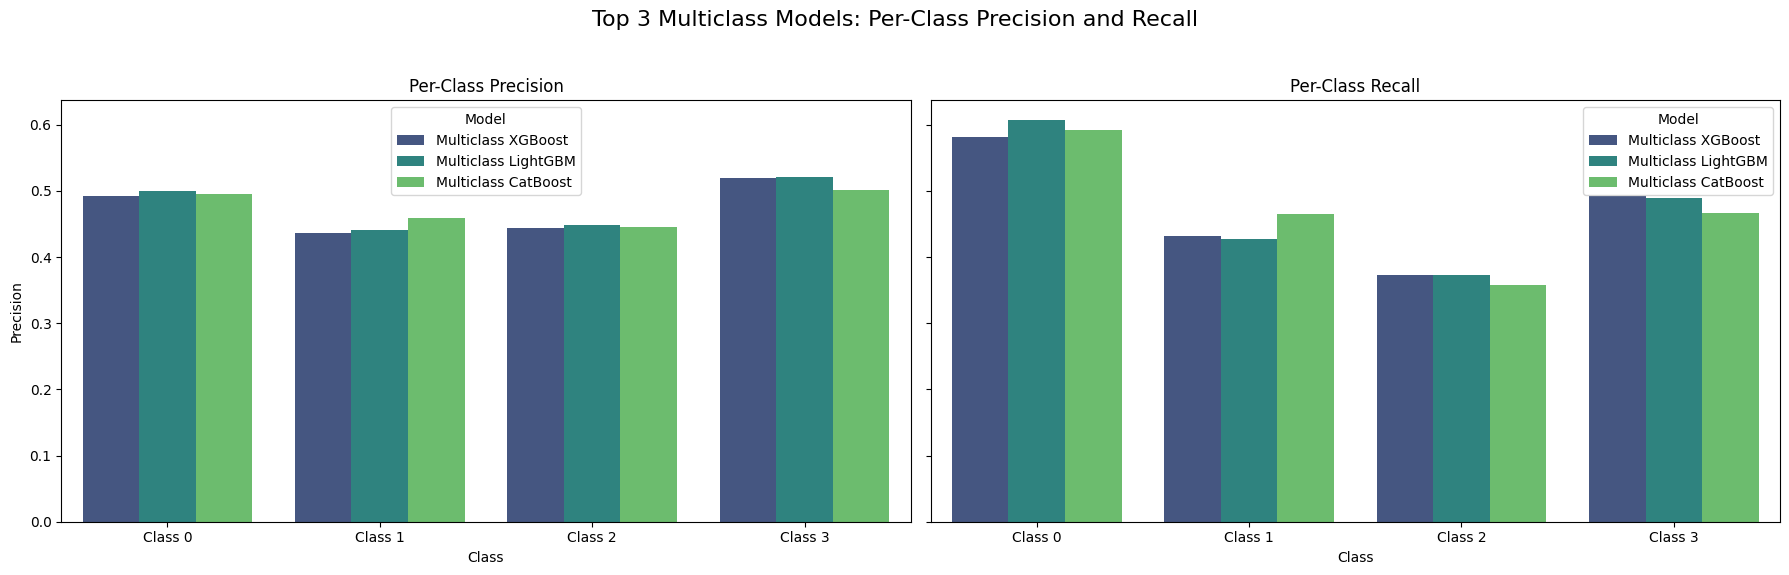

In [ ]:
# To visualize per-class metrics, let's select the top 3 models by Accuracy
top_models = metrics_df_multi_summary_sorted.head(3)['Model'].tolist()

top_models_metrics = [m for m in all_multi_metrics if m['Model'] in top_models]

plot_data_precision = []
plot_data_recall = []

for model_metrics in top_models_metrics:
    model_name = model_metrics['Model']
    for i, class_label in enumerate(classes):
        plot_data_precision.append({
            'Model': model_name,
            'Class': f'Class {class_label}',
            'Precision': model_metrics['Precision (Per-Class)'][i]
        })
        plot_data_recall.append({
            'Model': model_name,
            'Class': f'Class {class_label}',
            'Recall': model_metrics['Recall (Per-Class)'][i]
        })

df_plot_precision = pd.DataFrame(plot_data_precision)
df_plot_recall = pd.DataFrame(plot_data_recall)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
fig.suptitle("Top 3 Multiclass Models: Per-Class Precision and Recall", fontsize=16)

sns.barplot(ax=axes[0], x='Class', y='Precision', hue='Model', data=df_plot_precision, palette='viridis')
axes[0].set_title('Per-Class Precision')
axes[0].set_ylabel('Precision')
axes[0].legend(title='Model')

# Plotting per-class Recall
sns.barplot(ax=axes[1], x='Class', y='Recall', hue='Model', data=df_plot_recall, palette='viridis')
axes[1].set_title('Per-Class Recall')
axes[1].set_ylabel('Recall')
axes[1].legend(title='Model')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Question 1
Choose the best multiclass-classification metric for your dataset and justify.


---



For this dataset, given its relatively balanced class distribution, **Accuracy** provides a good overall indication of model performance. However, the **Weighted F1-score** is considered the most comprehensive and robust "best" metric. It balances precision and recall and accounts for subtle class imbalances by weighting the F1-score of each class by its support.

## Question 2
Explain how KNN and Decision Trees can be extended to multi-label classification problems.


---



KNN can be extended to multi-label classification by looking at the labels of the **k nearest neighbors** and assigning all labels that appear most frequently among them, often using thresholding on label frequencies.

Decision Trees can handle multi-label data by training **one tree per label** (binary relevance) or by modifying the tree to predict a **set of labels** at each leaf. Both methods adapt naturally because they can make independent decisions for each label.


## Question 3
### For a multi-label classification problem in football (predicting national team play, heart problems, knee injuries, or captaincy), what accuracy metric would you use to best evaluate a classification algorithm and why?

The best metric for this multi-label football problem is **Hamming Loss**. It evaluates each label independently and measures the fraction of labels that are predicted incorrectly, which fits well since players can have any combination of the four conditions. Unlike standard accuracy, it does not require all labels to be predicted perfectly at once. A lower Hamming Loss means the model correctly identifies more of each player's conditions.


# 4. Challenging Questions

## 1. Bias–variance trade-off in regression models

High bias means the model is too simple and underfits; high variance means the model is too sensitive and overfits. The goal is to find a balance where the model is flexible enough to learn patterns but not too flexible to memorize noise.

## 2. When does Kernel Regression outperform Linear Regression?

Kernel Regression performs better when the relationship between features and the target is non-linear.

## 3. Compare L1 vs L2 regularization

L1 (LASSO) adds absolute coefficient penalties, forcing some weights to become exactly zero → feature selection.

L2 (Ridge) adds squared penalties, shrinking coefficients smoothly but not to zero → stabilizes multicollinearity.

a. When does LASSO perform better?

When you expect many irrelevant features and want automatic feature selection.

b. When does Ridge perform better?

When features are correlated or when all features are useful and you want smooth coefficient shrinkage.

c. Why does LASSO produce sparsity?

The absolute penalty creates sharp corners in the optimization landscape, allowing coefficients to hit exactly zero.

## 4. Explain why MAPE is unreliable in some datasets

MAPE divides by the true value, so when the actual values are near zero, the error explodes. This makes MAPE unstable and misleading for small or zero targets.

## 5. Discuss the effect of outliers on regression models

Outliers pull the regression line toward themselves and inflate error metrics. Models using squared errors (like Linear Regression) are especially sensitive.

## 6. Effect of class imbalance on binary metrics. Why is accuracy misleading?

With imbalance, accuracy becomes inflated by predicting the majority class. Precision, recall, F1, and AUC are better because they consider minority-class performance.

## 7. How decision boundaries differ fundamentally

Linear models create straight lines/planes; kernel models create curved boundaries; KNN creates irregular boundaries based on local neighborhoods; trees create box-like, axis-aligned regions.

## 8. Effect of K in KNN

Small K makes the model sensitive to noise (high variance), while large K oversmooths the decision boundary (high bias)

## 9. Overfitting in Decision Trees
a. Why do they overfit?

They split until every leaf is pure, memorizing noise.

b. Why is max depth not enough?

Trees can still create very narrow branches or biased splits even with depth limits.

c. How pruning works?

Pruning removes weak or low-information branches, reducing complexity after training.

## 10. Why Tree-based models are good feature selectors

Trees split using the most informative features, and repeated splits show which features reduce impurity the most. Features that never split are naturally less important.

## 11. Micro vs Macro vs Weighted F1

Micro F1: aggregates all predictions → favors large classes.

Macro F1: averages per class equally → treats small classes fairly.

Weighted F1: class-average weighted by class size.

a. When is Macro F1 better?

When minority classes matter equally and you want balanced evaluation.

b. When is Weighted F1 misleading?

When majority classes dominate; it hides poor minority-class performance.

c. Why does Micro F1 favor large classes?

Because it counts all samples equally, so large classes contribute most.

## 12. Multi-label vs Multiclass
a. Fundamental difference

Output space: Multiclass → one label; Multi-label → multiple labels per sample.

Loss functions: Multiclass uses softmax loss; Multi-label uses independent sigmoid losses.

Thresholding: Multi-label requires per-label probabilities and thresholds.

Metrics: Multi-label uses Hamming Loss, Jaccard, subset accuracy, etc.

b. Why KNN and Decision Trees extend naturally?

They can predict each label independently: KNN by neighbor voting per label, trees by growing one tree per label or outputting label sets.

## 13. Explain precision–recall trade-off

The precision–recall trade-off comes from adjusting the classification threshold.
Lowering the threshold increases recall because the model predicts more positives, but this also reduces precision by adding more false positives.
Raising the threshold increases precision but lowers recall because fewer true positives are captured.

## 14. Explain ROC vs PR curve

ROC shows trade-off between true positive and false positive rates. PR curve focuses only on positives and is better for imbalanced datasets. PR gives more realistic evaluation when negatives dominate.

## 15. Improving models with unlimited time/resources
a. Better preprocessing

Handle outliers, scale features, encode data properly, remove noise.

b. Better features

Add domain knowledge features, interactions, embeddings, and temporal signals.

c. Better models

Try ensembles, boosted trees, kernel methods, or deep learning.

d. Better metrics

Use task-specific metrics like RMSE, PR AUC, Hamming Loss, or class-wise F1 depending on the problem.